In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.modeling import models
from astropy import units as u
import astropy.constants as const
from astropy.nddata import StdDevUncertainty
from astropy.visualization import quantity_support
quantity_support()

from specutils.analysis import snr, correlation, equivalent_width, template_logwl_resample
from specutils.manipulation import box_smooth, gaussian_smooth, trapezoid_smooth, extract_region
from specutils.spectra import Spectrum1D, SpectralRegion, SpectrumCollection
from specutils.fitting import fit_generic_continuum, find_lines_derivative, fit_lines

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from astropy.utils.data import download_file
from specutils.io.registers import identify_spectrum_format

# Spectrum

In [3]:
identify_spectrum_format("DMTau.ms.fits")  

'iraf'

In [4]:
spec = pd.read_table("DMTau.dat", sep="\s+", usecols=['wavelength', 'flux'])

In [5]:
spec

,wavelength,flux
0,3615.143799,13.71980
1,3616.614852,39.36613
2,3618.085905,41.71244
3,3619.556958,35.91117
4,3621.028011,-15.86438
...,...,...
2630,7484.013200,1056.82500
2631,7485.484253,1065.65900
2632,7486.955306,1029.39800
2633,7488.426359,1020.24000


In [6]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [7]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [16]:
preproc_spec = spectra_preproc(spec, bins=wavelength_bins())

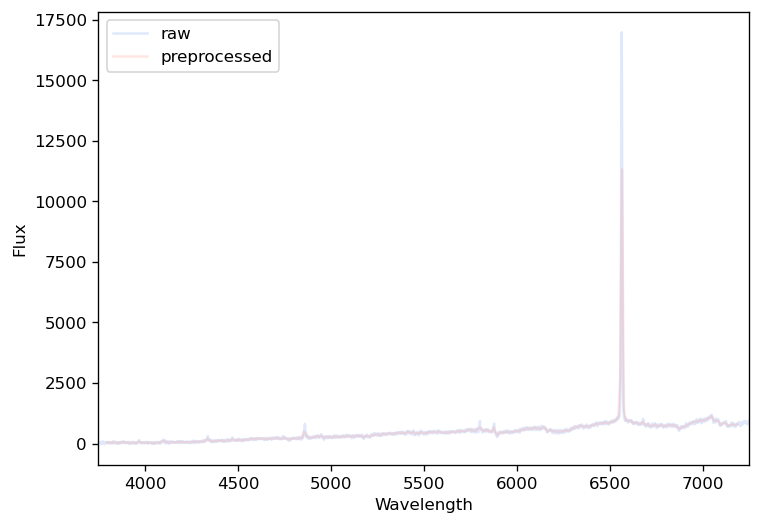

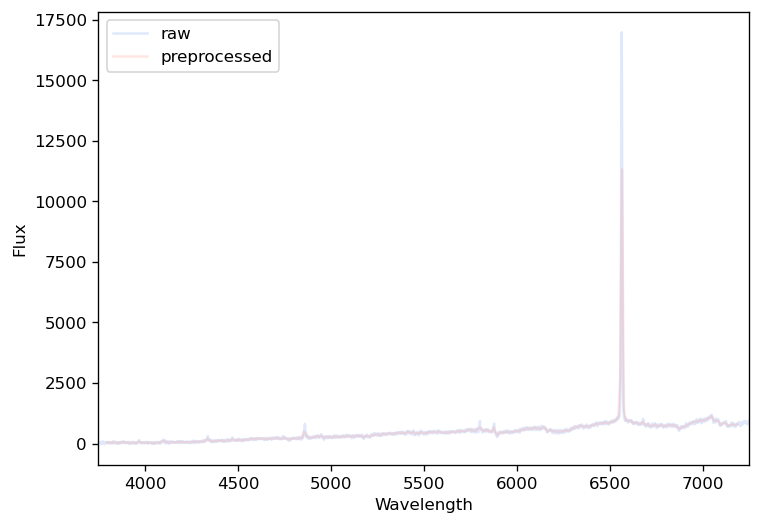

In [17]:
plot_spectra(spec, preproc_spec)

In [24]:
# Replace the inflated h-alpha line with a more manageable value
preproc_spec.at[277, 'Flux'] = 5000

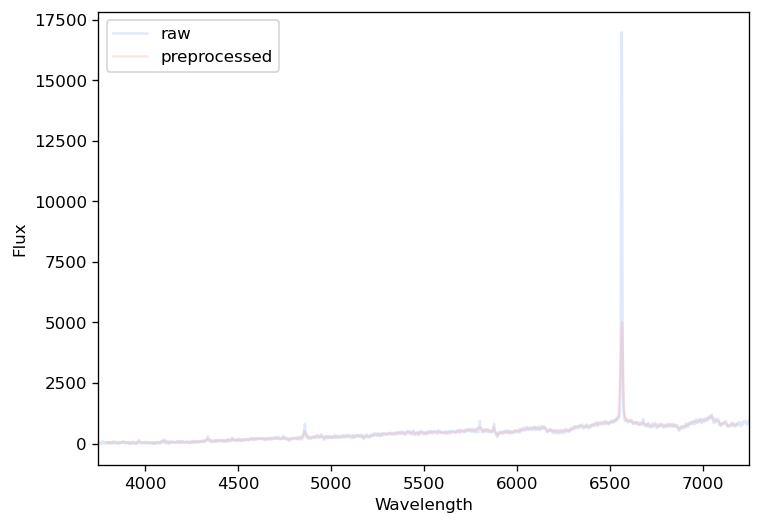

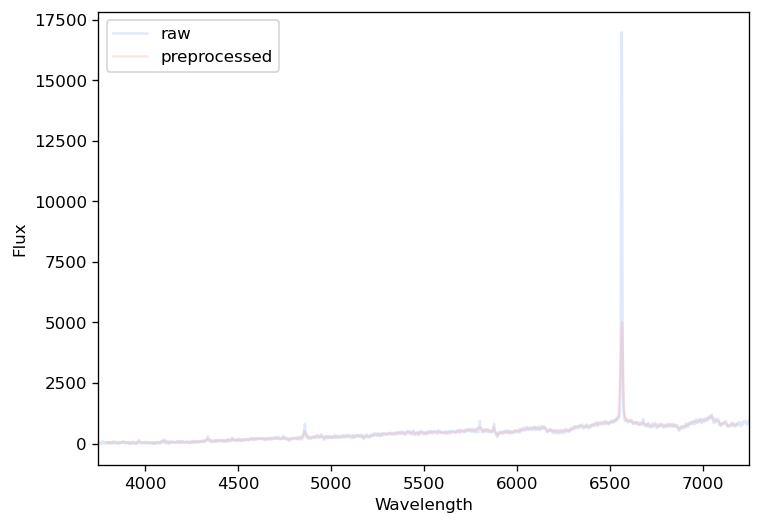

In [25]:
plot_spectra(spec, preproc_spec)

In [30]:
n = 'DMTau'

#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [31]:
# save the new spectra
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)

# Light Curve

In [32]:
lc = pd.read_csv('DMTau/DMTau_LC.csv')

In [33]:
lc.rename(columns={'-2.4e+06':'mjd'}, inplace=True)

In [39]:
len(lc)

185

In [34]:
preproc_LC_timesort = LC_timesort_preproc(lc, resample_len='1d')

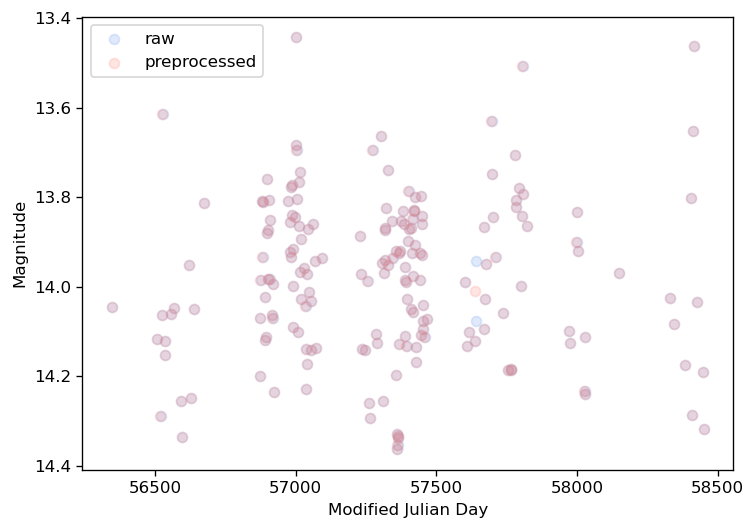

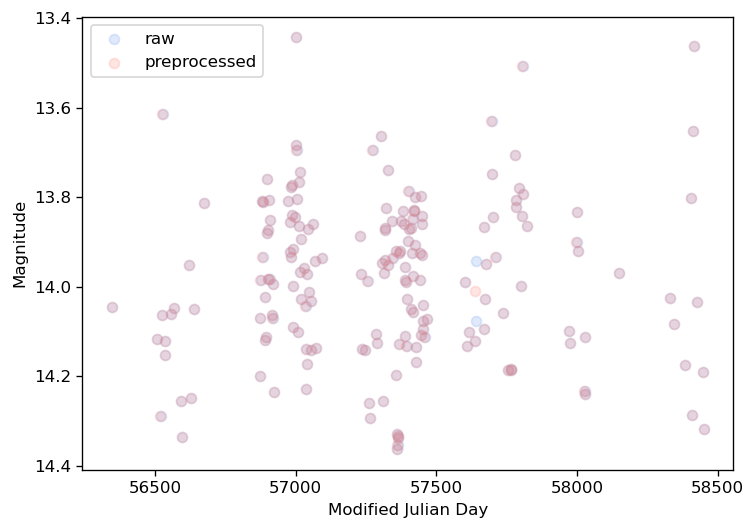

In [38]:
plot_timesort(lc, preproc_LC_timesort)

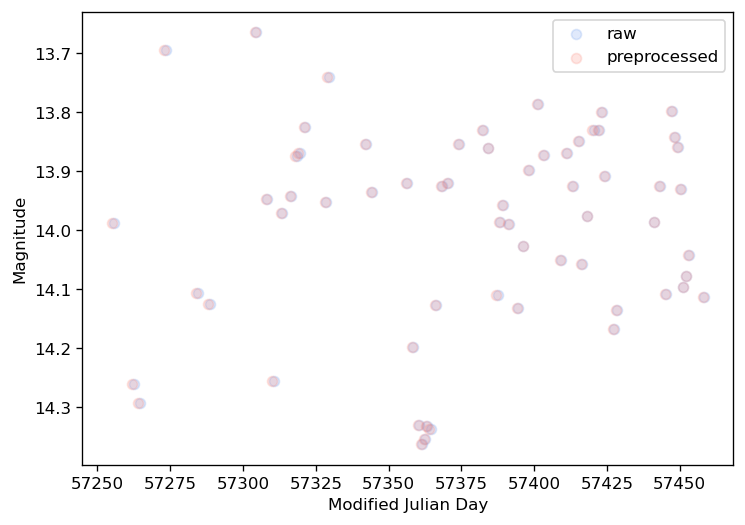

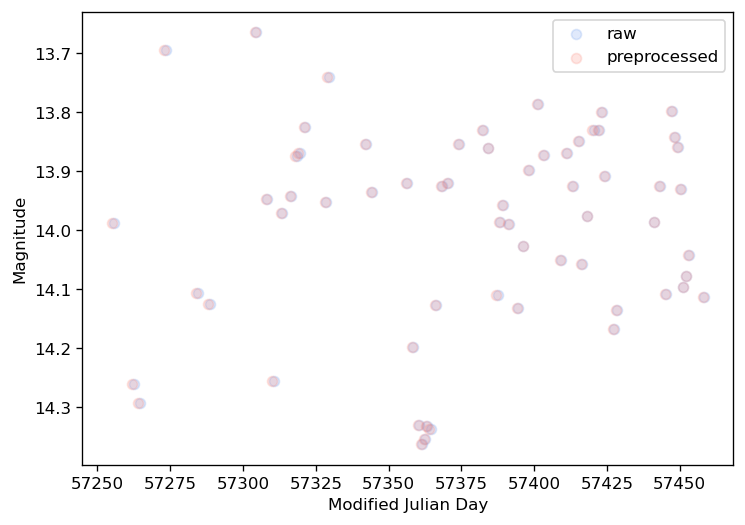

In [49]:
plot_timesort(lc, preproc_LC_timesort, start=57255, end=57459)

In [51]:
len(preproc_LC_timesort[preproc_LC_timesort['Modified Julian Day'].between(57255, 57459)])

205

In [52]:
preproc_LC_timesort = preproc_LC_timesort[preproc_LC_timesort['Modified Julian Day'].between(57255, 57459)]

In [53]:
preproc_LC_timesort.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)